# Assignment Notebook

## Data Visualisation and using statistical learning to answer a business question 



## Part 1: Data Visualisation

### 1.1 Import libraries

A survey was conducted to gauge an audience interest in different data science topics, namely:

Big Data (Spark / Hadoop)
Data Analysis / Statistics
Data Journalism
Data Visualization
Deep Learning
Machine Learning
The participants had three options for each topic: Very Interested, Somewhat interested, and Not interested. **2,233** respondents completed the survey.

If you examine the csv file, you will find that the first column represents the data science topics and the first row represents the choices for each topic.

Use the pandas read_csv method to read the csv file into a pandas dataframe.

In [78]:
#import libraries and read data


In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [80]:
# Read csv file, TSA-Topic Survey Assignment
TSA = pd.read_csv(r'C:\Users\LengaR\OneDrive - Capricorn Investment Holdings Ltd\Downloads\Topic_Survey_Assignment (1).csv')

### 1.2 Visualisation

Use the artist layer of Matplotlib to replicate the bar chart below to visualize the percentage of the respondents' interest in the different data science topics surveyed.
To create this bar chart, you can follow the following steps:

1. Sort the dataframe in descending order of Very interested.
2. Convert the numbers into percentages of the total number of respondents. Recall that 2,233 respondents completed the survey. Round percentages to 2 decimal places.

As for the chart:
1. use a figure size of (20, 8),
2. bar width of 0.8,
3. use color #5cb85c for the Very interested bars, color #5bc0de for the Somewhat interested bars, and color #d9534f for the Not interested bars,
4. use font size 14 for the bar labels, percentages, and legend,
5. use font size 16 for the title, and,
6. display the percentages above the bars as shown above, and remove the left, top, and right borders.

In [81]:
#Prep the data
# Sorting in descending order 
TSA_sorted = TSA.sort_values (by='Very interested', ascending=False)

#Number of Respondents
Num_Respondents =2233

# Calculate percentages
TSA['Very Interested %'] = (TSA['Very interested'] / Num_Respondents) * 100
TSA['Somewhat Interested %'] = (TSA['Somewhat interested'] / Num_Respondents) * 100
TSA['Not Interested %'] = (TSA['Not interested'] / Num_Respondents) * 100

# Round percentages to 2 decimal places
TSA['Very Interested %'] = TSA['Very Interested %'].round(2)
TSA['Somewhat Interested %'] = TSA['Somewhat Interested %'].round(2)
TSA['Not Interested %'] = TSA['Not Interested %'].round(2)

# Print DataFrame to check results
print(TSA[['Data science topics', 'Very Interested %', 'Somewhat Interested %', 'Not Interested %']])

          Data science topics  Very Interested %  Somewhat Interested %  \
0   Big Data (Spark / Hadoop)              59.65                  32.65   
1  Data Analysis / Statistics              75.59                  19.88   
2             Data Journalism              19.21                  48.41   
3          Data Visualization              60.01                  32.87   
4               Deep Learning              56.56                  34.48   
5            Machine Learning              72.95                  21.36   

   Not Interested %  
0              5.69  
1              2.69  
2             27.32  
3              4.57  
4              6.09  
5              3.31  


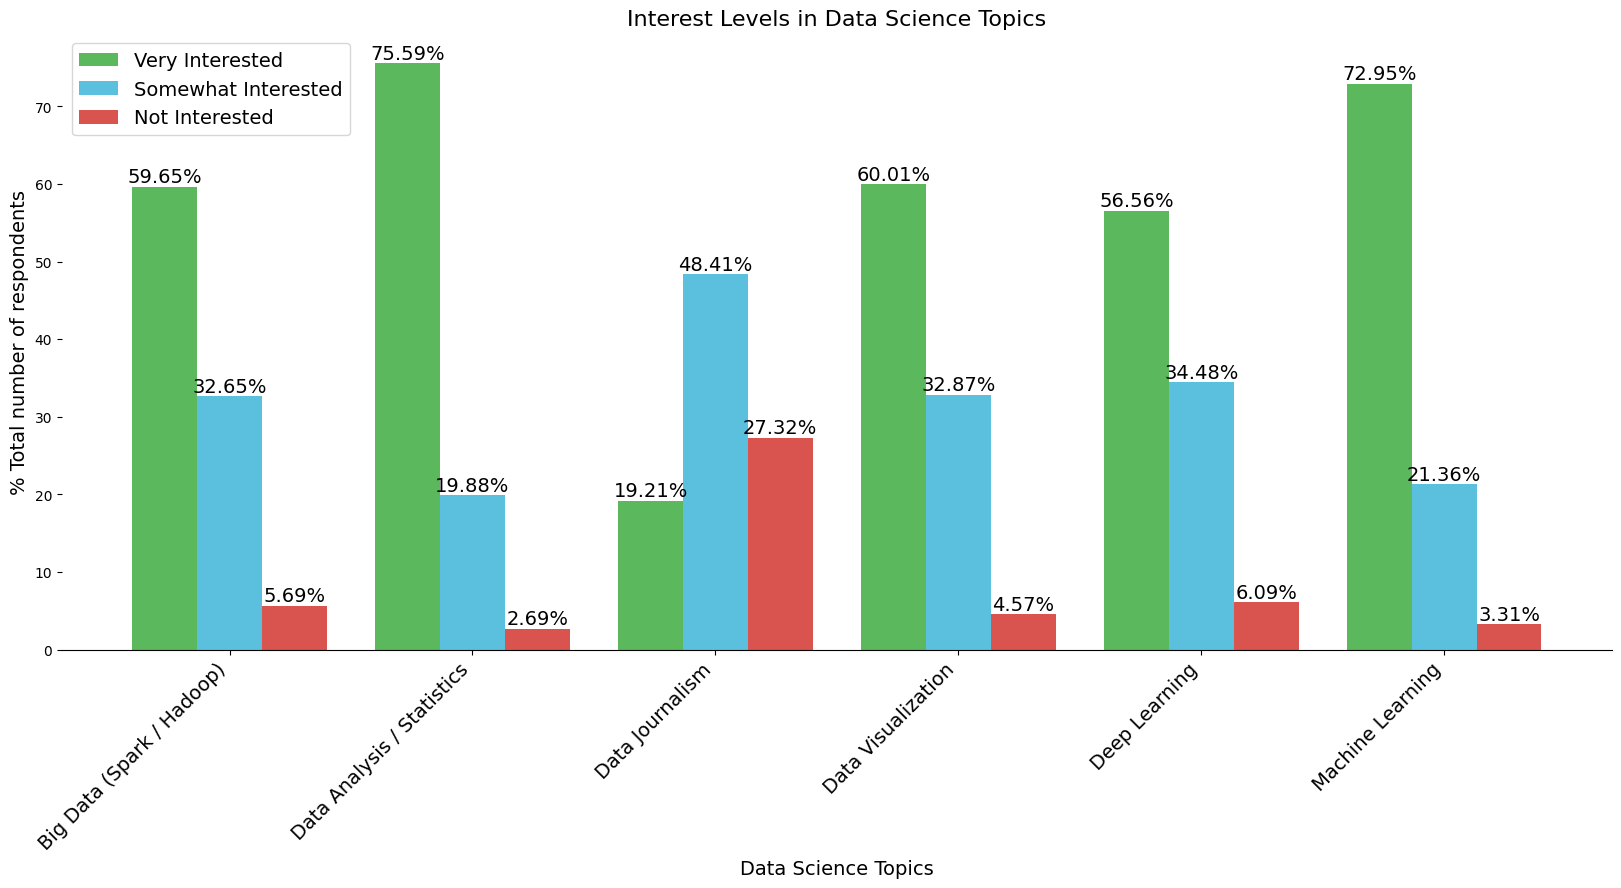

In [82]:
#Create the plot
# Figure size
figure = plt.subplots(figsize=(20, 8))

x = np.arange(len(TSA))

#Bar width
bar_width = 0.8

# Bar
VeryInterested = plt.bar(x - bar_width/3, TSA['Very Interested %'], bar_width/3, label='Very Interested', color='#5cb85c')
SomewhatInterested = plt.bar(x, TSA['Somewhat Interested %'], bar_width/3, label='Somewhat Interested', color='#5bc0de')
NotInterested = plt.bar(x + bar_width/3, TSA['Not Interested %'], bar_width/3, label='Not Interested', color='#d9534f')

# Adding percentages above bars
def add_percentages(bars, values):
    for bar, value in zip(bars, values):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, f'{value:.2f}%', ha='center', va='bottom', fontsize=14)

add_percentages(VeryInterested, TSA['Very Interested %'])
add_percentages(SomewhatInterested, TSA['Somewhat Interested %'])
add_percentages(NotInterested, TSA['Not Interested %'])

# X-axis labels
plt.xticks(x, TSA['Data science topics'], rotation= 45, ha='right', fontsize=14)

# Title and labels
plt.title('Interest Levels in Data Science Topics', fontsize=16)
plt.xlabel('Data Science Topics', fontsize=14)
plt.ylabel('% Total number of respondents', fontsize=14)

# Legend
plt.legend(fontsize=14)

#Remove the left, top, and right borders
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(True)
plt.gca().xaxis.set_ticks_position('bottom')
plt.gca().yaxis.set_ticks_position('left')


# Show plot
plt.show()



## Part 2: Supervised learning using a tree-based model

### 2.1 Import libraries

In [83]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [84]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [85]:
# Import libraries
# General
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # For 3D plotting
import seaborn as sns

# For tree-based models
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

### 2.2 Import and explore the insurance claim data

In [86]:
# Import data
import os
# Read csv file
CD = pd.read_csv(r'C:\Users\LengaR\OneDrive - Capricorn Investment Holdings Ltd\Downloads\ClaimsData.csv')

In [87]:
# Explore the size of the data set
num_rows, num_columns = CD.shape
print(f'The dataset has {num_rows} rows and {num_columns} columns.')

# Get the file size
file_size = os.path.getsize(r'C:\Users\LengaR\OneDrive - Capricorn Investment Holdings Ltd\Downloads\ClaimsData.csv')
print(f'File size: {file_size / (1024**2):.2f} MB')

# Memory usage of the DataFrame
memory_usage = CD.memory_usage(deep=True).sum()
print(f'Memory usage: {memory_usage / (1024**2):.2f} MB')

# Ensure 'category' column exists
if 'Category' in CD.columns:
    # Get unique values in the 'category' column
    unique_categories = CD['Category'].unique()
    print('Unique values in the "Category" column:', unique_categories)
else:
    print('The column "Category" does not exist in the dataset.')


The dataset has 1500 rows and 7 columns.
File size: 0.06 MB
Memory usage: 0.27 MB
Unique values in the "Category" column: ['Sedan' 'SAV' 'Small' 'SUV' 'Super']


In [88]:
# Explore type of data and feature names
# Data Types
data_types = CD.dtypes
print('Data types:\n', data_types)

# Feature name(Column names)
feature_names = CD.columns.tolist()
print('Feature names:', feature_names)

Data types:
 Claim        float64
Category      object
Mileage      float64
AgeP           int64
ModelYear      int64
PreOwned      object
ServHist      object
dtype: object
Feature names: ['Claim', 'Category', 'Mileage', 'AgeP', 'ModelYear', 'PreOwned', 'ServHist']


 #### 2.3 Plot the data

**a) Visualise the continuous variables on a scatterplot**

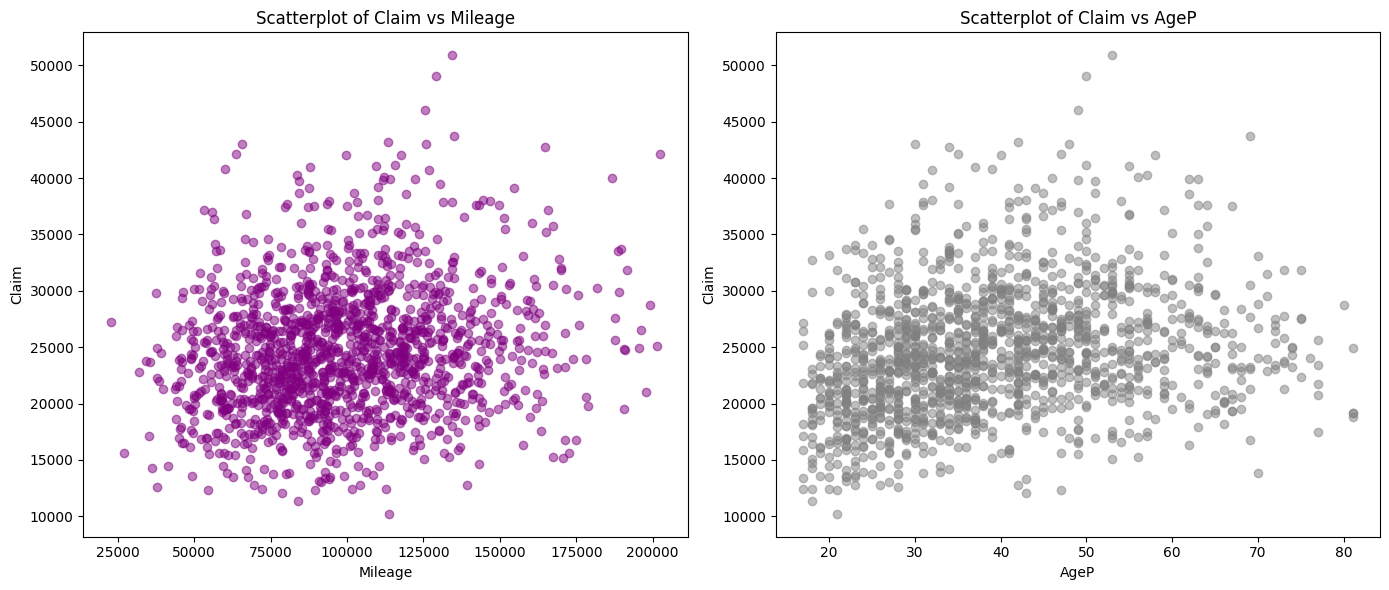

In [89]:
#Plot a scatterplot of y vs the continuous variables (Mileage and AgeP)
# Used figure with two subplots

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Scatterplot of y vs Mileage (Claim being y)
ax[0].scatter(CD['Mileage'], CD['Claim'], color='purple', alpha=0.5)
ax[0].set_title('Scatterplot of Claim vs Mileage')
ax[0].set_xlabel('Mileage')
ax[0].set_ylabel('Claim')

# Scatterplot of y vs AgeP (Claim being y)
ax[1].scatter(CD['AgeP'], CD['Claim'], color='grey', alpha=0.5)
ax[1].set_title('Scatterplot of Claim vs AgeP')
ax[1].set_xlabel('AgeP')
ax[1].set_ylabel('Claim')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

**b) Compare the mean claim amount for categorical variables**  

In [90]:
# Calculate the mean claim amount of pre-owned and not pre-owned vehicles
Mean = CD.groupby('PreOwned')['Claim'].mean()
print(Mean)



PreOwned
No     23435.093700
Yes    26987.035106
Name: Claim, dtype: float64


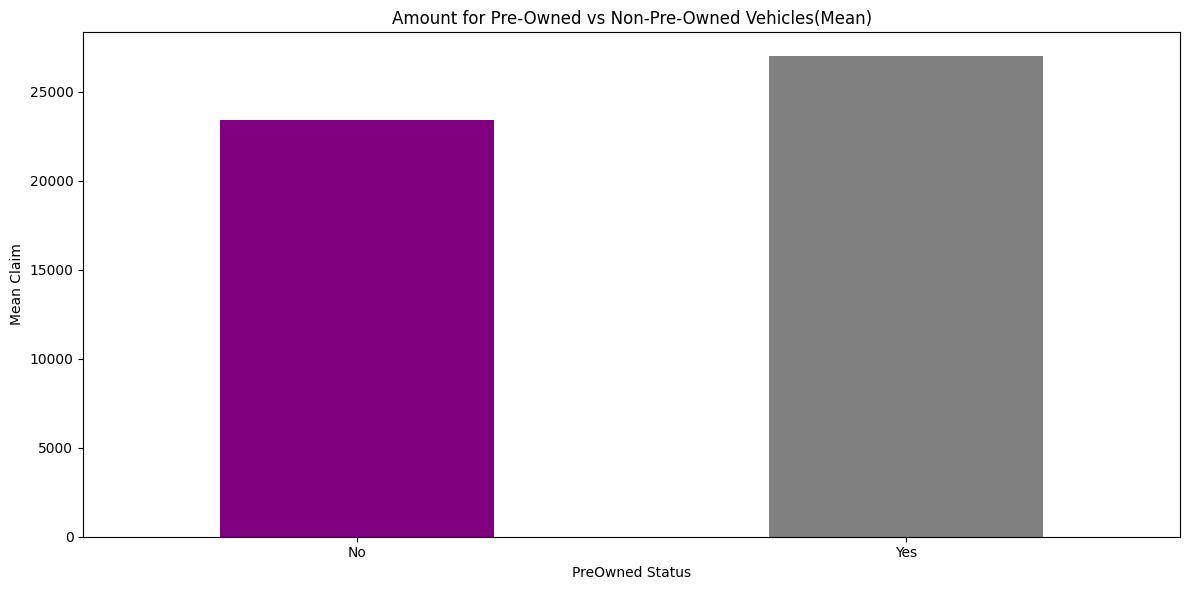

In [91]:
# Figure size
plt.figure(figsize=(12, 6))
Mean.plot(kind='bar', color=['purple', 'grey'])

#Labels
plt.xlabel('PreOwned Status')
plt.ylabel('Mean Claim')
plt.title('Amount for Pre-Owned vs Non-Pre-Owned Vehicles(Mean)')
plt.xticks(rotation=0) 

plt.tight_layout()
plt.show()



In [92]:
# Calculate the mean claim amount of vehicles with and without service histories
Mean = CD.groupby('ServHist')['Claim'].mean()
print(Mean)

ServHist
No     24368.474882
Yes    24780.543485
Name: Claim, dtype: float64


In [93]:
# Calculate the mean claim amount of vehicles in each category
Mean = CD.groupby('Category')['Claim'].mean()
print(Mean)

Category
SAV      25567.220256
SUV      29439.955177
Sedan    23759.341389
Small    21458.093665
Super    33107.498750
Name: Claim, dtype: float64


In [94]:
# Calculate the mean claim amount of vehicles for each model year
Mean = CD.groupby('ModelYear')['Claim'].mean()
print(Mean)

ModelYear
2011    21251.196667
2012    22089.076316
2013    22797.422576
2014    24559.396422
2015    24396.627463
2016    24930.396192
2017    24859.324408
2018    24844.633413
2019    25487.106147
Name: Claim, dtype: float64


### Insights Drawn From Graphs

1. In the exploratory data analysis, several graphs and calculations were provided: two scatterplots, two bar graphs, and two calculations without graphs. What insight can you draw from these? In your answer, give a short interpretation for two graphs or calculations. For example, are there cars with a particular mileage that have larger claims? Are the mean claim amounts in any of the categories different? Ensure that you provide possible reasons for any differences you observe. 

    ```ANSWER:```
    
    **Claims vs. Mileage Scatterplot:** Patterns are spread out, showing no relationship among the data points on the graph, indicating that there is no significant relationship  between mileage and claim amounts. This would imply that factors other than mileage have little bearing on how much is claimed.

  **Claims vs. Age Scatterplot:** The data points are spread out, but there may be a trend showing that drivers between the ages of 20 and 40 make more claims than do senior drivers.Reason can be that younger drivers may have greater accident rates because of they are reckless drivers. 

#### 2.4 Prepare the data

In [95]:
# Check that there are no missing values
MissingValues = CD.isnull().sum()
print(MissingValues)

Claim        0
Category     0
Mileage      0
AgeP         0
ModelYear    0
PreOwned     0
ServHist     0
dtype: int64


In the next cell, you will one-hot encode the `Category` variable. You may also refer to the scikit-learn [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) and [user guide](https://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features).

In [96]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV

In [97]:
# One-hot encode the "Category" variable and add the encoded feature to the dataframe 
# Name the new columns (hint: columns = ohe.get_feature_names())
ohe = OneHotEncoder(sparse_output=False)

encoded_features = ohe.fit_transform(CD[['Category']])

columns = ohe.get_feature_names_out(['Category'])

encoded_df = pd.DataFrame(encoded_features, columns=columns)


# Add encoded feature to the dataframe and view the new dataframe with .head()
CD = pd.concat([CD, encoded_df], axis=1)
CD.head()

,Claim,Category,Mileage,AgeP,ModelYear,PreOwned,ServHist,Category_SAV,Category_SUV,Category_Sedan,Category_Small,Category_Super
0,42089.53,Sedan,99754.4,40,2016,Yes,Yes,0.0,0.0,1.0,0.0,0.0
1,24097.69,SAV,63926.9,43,2018,No,No,1.0,0.0,0.0,0.0,0.0
2,19190.63,Small,134829.8,28,2018,No,Yes,0.0,0.0,0.0,1.0,0.0
3,20574.27,Small,59107.4,28,2018,No,Yes,0.0,0.0,0.0,1.0,0.0
4,26734.33,SAV,132746.9,22,2017,No,Yes,1.0,0.0,0.0,0.0,0.0


Choose the following variables as features: `Mileage`, `AgeP`, and `Category0` to `Category5`. You may use the `.loc[]` or `.iloc[]` method.

In [98]:
# .loc[] method
Features = CD.loc[:, ['Mileage', 'AgeP', 'Category_SAV', 'Category_SUV', 'Category_Sedan', 'Category_Small', 'Category_Super']]

print(Features)

       Mileage  AgeP  Category_SAV  Category_SUV  Category_Sedan  \
0      99754.4    40           0.0           0.0             1.0   
1      63926.9    43           1.0           0.0             0.0   
2     134829.8    28           0.0           0.0             0.0   
3      59107.4    28           0.0           0.0             0.0   
4     132746.9    22           1.0           0.0             0.0   
...        ...   ...           ...           ...             ...   
1495   97675.4    42           0.0           0.0             1.0   
1496  163871.9    53           0.0           0.0             0.0   
1497   66468.7    72           0.0           0.0             1.0   
1498   94859.3    47           1.0           0.0             0.0   
1499   81091.1    36           0.0           0.0             1.0   

      Category_Small  Category_Super  
0                0.0             0.0  
1                0.0             0.0  
2                1.0             0.0  
3                1.0       

In [99]:
# Split data into features (X) and response (y) 
# x-features, and y-target variable Claim (STUDENT COMMENT)

X = CD.loc[:, ['Mileage', 'AgeP', 'Category_SAV', 'Category_SUV', 'Category_Sedan', 'Category_Small', 'Category_Super']]
y = CD['Claim']

print("Features (X):")
print(X)
print("\nResponse (y):")
print(y)


Features (X):
       Mileage  AgeP  Category_SAV  Category_SUV  Category_Sedan  \
0      99754.4    40           0.0           0.0             1.0   
1      63926.9    43           1.0           0.0             0.0   
2     134829.8    28           0.0           0.0             0.0   
3      59107.4    28           0.0           0.0             0.0   
4     132746.9    22           1.0           0.0             0.0   
...        ...   ...           ...           ...             ...   
1495   97675.4    42           0.0           0.0             1.0   
1496  163871.9    53           0.0           0.0             0.0   
1497   66468.7    72           0.0           0.0             1.0   
1498   94859.3    47           1.0           0.0             0.0   
1499   81091.1    36           0.0           0.0             1.0   

      Category_Small  Category_Super  
0                0.0             0.0  
1                0.0             0.0  
2                1.0             0.0  
3            

In [100]:
X.head()

,Mileage,AgeP,Category_SAV,Category_SUV,Category_Sedan,Category_Small,Category_Super
0,99754.4,40,0.0,0.0,1.0,0.0,0.0
1,63926.9,43,1.0,0.0,0.0,0.0,0.0
2,134829.8,28,0.0,0.0,0.0,1.0,0.0
3,59107.4,28,0.0,0.0,0.0,1.0,0.0
4,132746.9,22,1.0,0.0,0.0,0.0,0.0


In [101]:
y.head()

0    42089.53
1    24097.69
2    19190.63
3    20574.27
4    26734.33
Name: Claim, dtype: float64

#### 2.5 Split the data into a training and test set

Recall that, in the 3.3 IDE activity M3U2 practice notebook, the steps in the following cell were introduced. You may also reference the documentation on the [scikit-learn website](https://scikit-learn.org/stable/index.html) for the following:
* train_test_split()
* DecisionTreeRegressor()
* mean_squared_error()

In [102]:
# Split the data into the training set and test set 
# Set random_state=0
X_train, X_test, y_train, y_test  = train_test_split(X, y, random_state=0)

# Fit data to tree-based model
# Set random_state=0
reg = DecisionTreeRegressor(random_state=0)
reg.fit(X_train, y_train)

# Model details
print("Model fitted successfully!")
print(f"Feature importances: {reg.feature_importances_}")

# Predictions on the test set
y_pred = reg.predict(X_test)

# Mean Squared Error
error = mean_squared_error(y_test, y_pred)

# MSE before pruning
print(f"Mean Squared Error before pruning (MSE): {error}")

Model fitted successfully!
Feature importances: [0.51986902 0.32723184 0.01871766 0.06870729 0.02295051 0.0229752
 0.01954847]
Mean Squared Error before pruning (MSE): 51962957.46049439


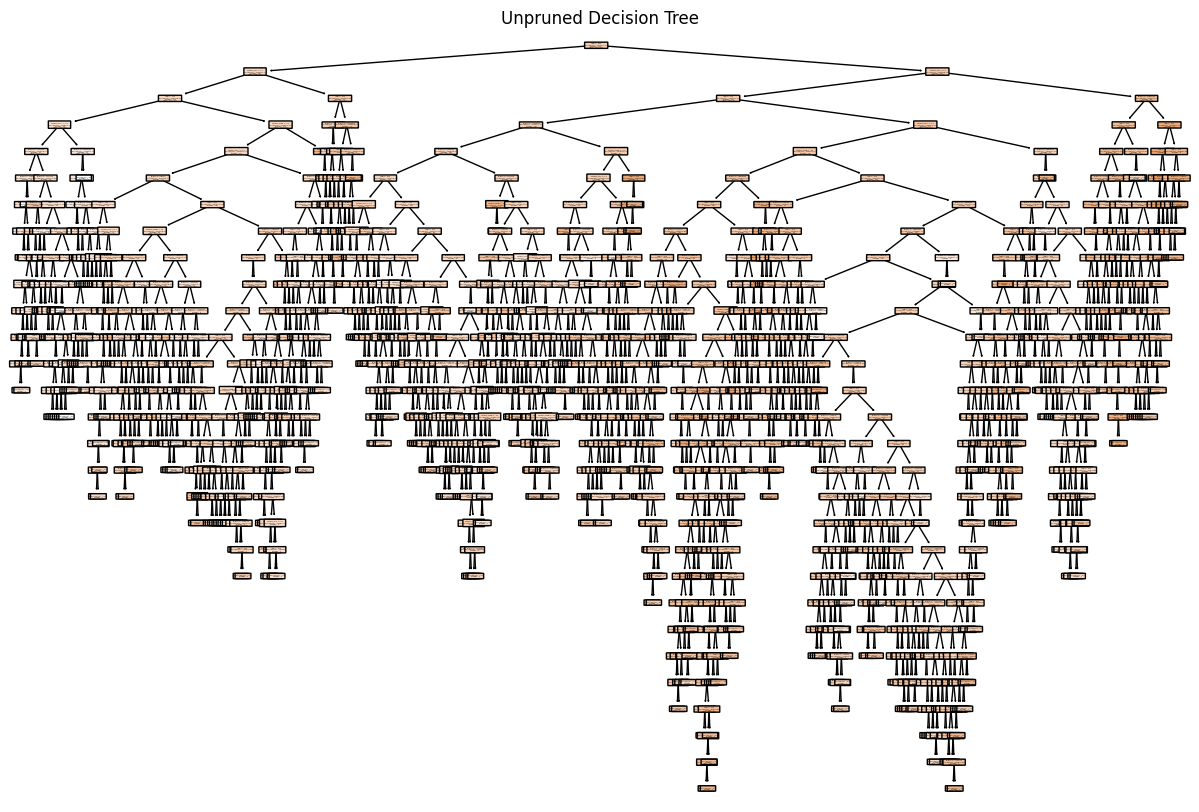

In [103]:
# Plot the unpruned tree
plt.figure(figsize=(15, 10))
plot_tree(reg, feature_names=X.columns, filled=True, rounded=True)
plt.title('Unpruned Decision Tree')
plt.show()

In [104]:
# Replace "reg" with the variable name you chose in "Fit data to tree-based model" above

X_train, X_test, y_train, y_test  = train_test_split(X, y, random_state=0)

# Fit data to tree-based model
Model = DecisionTreeRegressor(random_state=0)
Model.fit(X_train, y_train)

# Model details
print("Model fitted successfully!")
print(f"Feature importances: {Model.feature_importances_}")

# Predictions on the test set
y_pred = Model.predict(X_test)

# Mean Squared Error
error = mean_squared_error(y_test, y_pred)

# MSE before pruning
print(f"Mean Squared Error before pruning (MSE): {error}")

Model fitted successfully!
Feature importances: [0.51986902 0.32723184 0.01871766 0.06870729 0.02295051 0.0229752
 0.01954847]
Mean Squared Error before pruning (MSE): 51962957.46049439


In [105]:
# Optimal number of leaf nodes
# Parameter grid to search for optimal number of leaf nodes
param_grid = {
    'max_leaf_nodes': range(2, 21)  
}

# GridSearchCV to find the optimal number of leaf nodes
grid_search = GridSearchCV(estimator=Model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluating the model
y_pred = best_model.predict(X_test)
error = mean_squared_error(y_test, y_pred)

print(f"Optimal number of leaf nodes: {best_params['max_leaf_nodes']}")
print(f"Mean Squared Error of the best model: {error}")

Optimal number of leaf nodes: 13
Mean Squared Error of the best model: 29189124.177831512


Length of leaf_nodes_range: 19
Length of train_errors: 19
Length of test_errors: 19


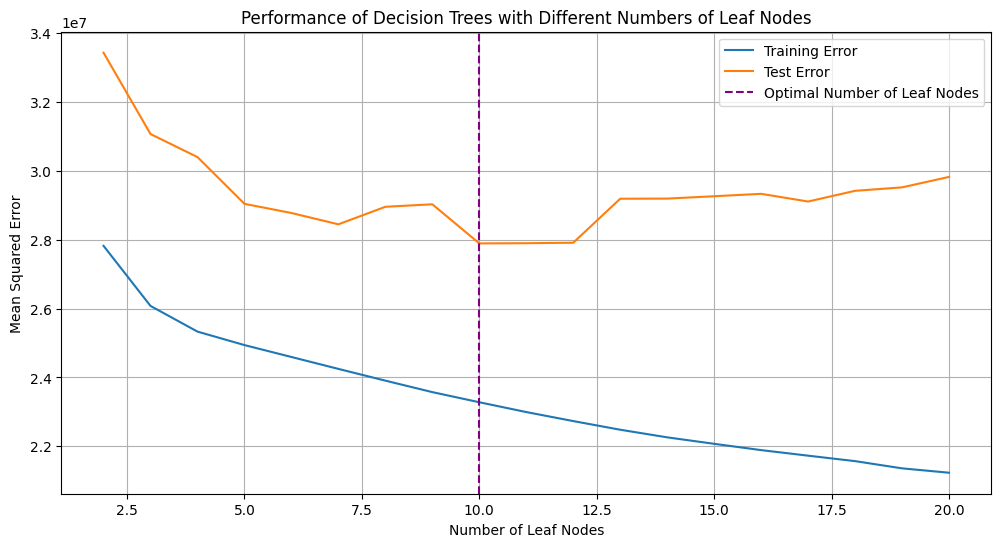

In [106]:
# Visualise the performance of each subtree on the training and test set
leaf_nodes_range = range(2, 21)
train_errors = []
test_errors = []

# Training and evaluating the model
for leaf_nodes in leaf_nodes_range:
    Model = DecisionTreeRegressor(max_leaf_nodes=leaf_nodes, random_state=0)
    Model.fit(X_train, y_train)
    
    # Calculating errors
    y_train_pred = Model.predict(X_train)
    y_test_pred = Model.predict(X_test)
    
    train_errors.append(mean_squared_error(y_train, y_train_pred))
    test_errors.append(mean_squared_error(y_test, y_test_pred))

# Checking lengths
print(f"Length of leaf_nodes_range: {len(leaf_nodes_range)}")
print(f"Length of train_errors: {len(train_errors)}")
print(f"Length of test_errors: {len(test_errors)}")

# Optimal number of leaf nodes
optimal_leaf_nodes = leaf_nodes_range[np.argmin(test_errors)] 

# Plot
plt.figure(figsize=(12, 6))

# Plot training and test errors
plt.plot(leaf_nodes_range, train_errors, label='Training Error')
plt.plot(leaf_nodes_range, test_errors, label='Test Error')

# Optimal number of leaf nodes
plt.axvline(x=optimal_leaf_nodes, color='purple', linestyle='--', label='Optimal Number of Leaf Nodes')

# Labels
plt.xlabel('Number of Leaf Nodes')
plt.ylabel('Mean Squared Error')
plt.title('Performance of Decision Trees with Different Numbers of Leaf Nodes')

# Legend
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [107]:
# To find the optimal maximum leaf nodes, cross validation is applied

# leaf nodes range
leaf_nodes_range = range(2, 21)
mean_cv_errors = []

# Cross validation for leaf nodes
for leaf_nodes in leaf_nodes_range:
    Model = DecisionTreeRegressor(max_leaf_nodes=leaf_nodes, random_state=0)
    
    # Cross validation
    cv_errors = -cross_val_score(Model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    mean_cv_errors.append(cv_errors.mean())

# Optimal number of leaf nodes
optimal_leaf_nodes = leaf_nodes_range[np.argmin(mean_cv_errors)]


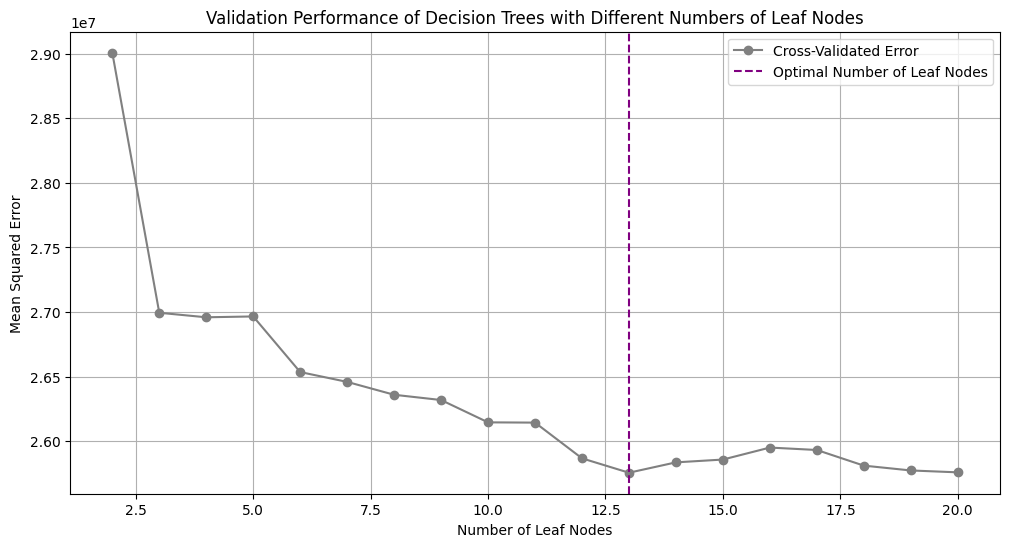

In [108]:
# Visualise the validation score in relation to maximum leaf nodes
# The plot
plt.figure(figsize=(12, 6))

# Plotting cross-validated errors
plt.plot(leaf_nodes_range, mean_cv_errors, marker='o', linestyle='-', color='grey', label='Cross-Validated Error')

# Optimal number of leaf nodes
plt.axvline(x=optimal_leaf_nodes, color='purple', linestyle='--', label='Optimal Number of Leaf Nodes')

# Labels
plt.xlabel('Number of Leaf Nodes')
plt.ylabel('Mean Squared Error')
plt.title('Validation Performance of Decision Trees with Different Numbers of Leaf Nodes')

# Legend
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [109]:
# Obtain the maximum leaf nodes with the highest validation score
highest_validation_score = min(mean_cv_errors)
print(f"Optimal number of leaf nodes: {optimal_leaf_nodes}")
print(f"Highest validation score: {highest_validation_score}")


Optimal number of leaf nodes: 13
Highest validation score: 25756390.364571907


In [110]:
# Use the optimum maximum leaf nodes to fit a parsimonious tree 
# Set random_state=0
# Fit the final model with the optimal number of leaf nodes
Model = DecisionTreeRegressor(max_leaf_nodes=optimal_leaf_nodes, random_state=0)
Model.fit(X_train, y_train)

# Print model details
print(f"Fitted Decision Tree with {optimal_leaf_nodes} maximum leaf nodes")

# You can also evaluate the model on the training and test sets if desired
from sklearn.metrics import mean_squared_error

# Predictions
y_train_pred = Model.predict(X_train)
y_test_pred = Model.predict(X_test)

# Calculate errors
train_error = mean_squared_error(y_train, y_train_pred)
test_error = mean_squared_error(y_test, y_test_pred)

print(f"Training Mean Squared Error: {train_error}")
print(f"Test Mean Squared Error: {test_error}")

Fitted Decision Tree with 13 maximum leaf nodes
Training Mean Squared Error: 22480886.34143903
Test Mean Squared Error: 29189124.177831512


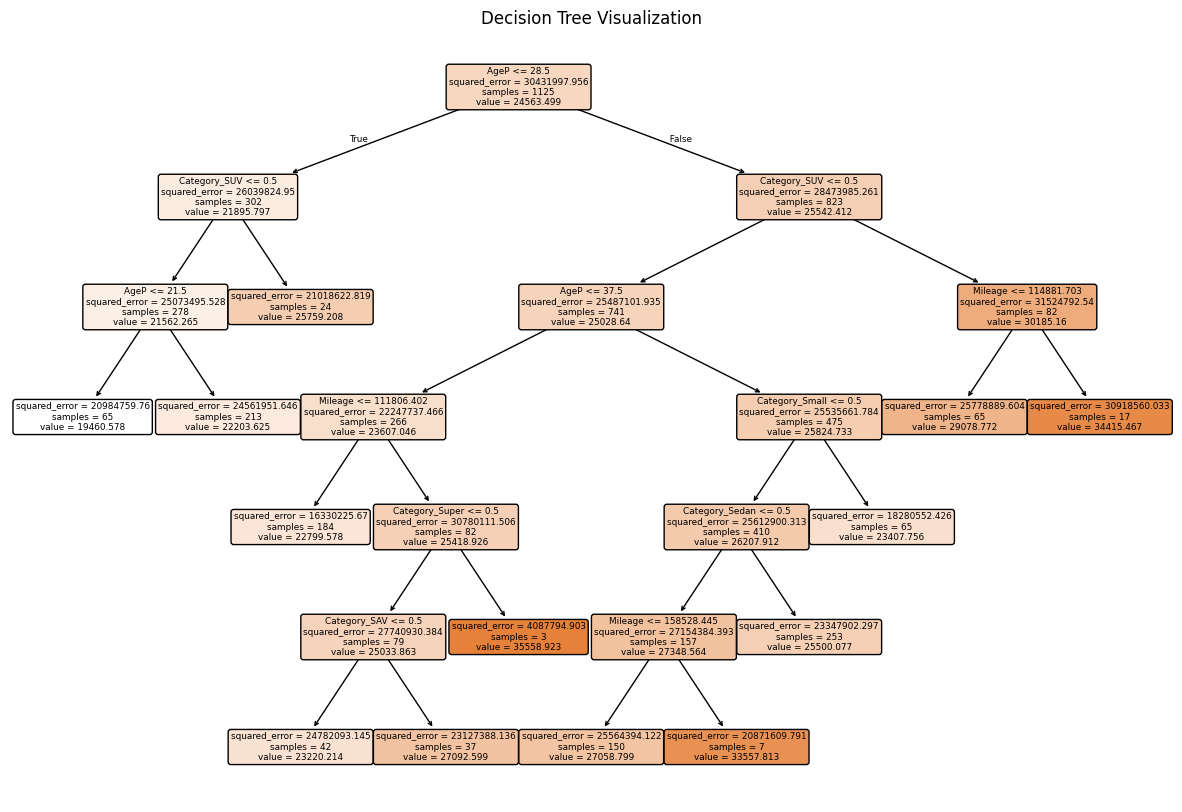

In [111]:
# Visualise the smaller pruned tree
plt.figure(figsize=(15, 10))
plot_tree(Model, filled=True, feature_names=X_train.columns, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

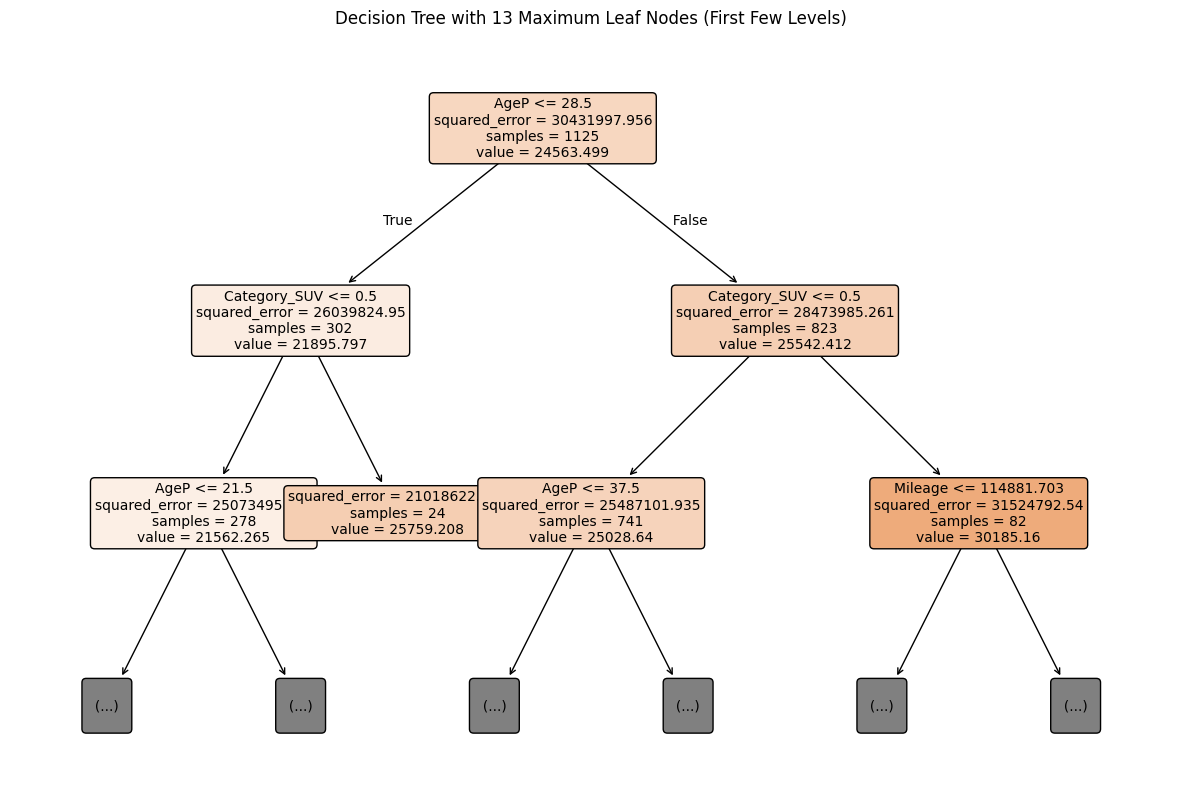

In [112]:
# Show the first few levels of the tree
plt.figure(figsize=(15, 10))  
plot_tree(Model, 
          feature_names=X_train.columns, 
          filled=True,  
          rounded=True,  
          fontsize=10,  
          max_depth=2)  
plt.title(f"Decision Tree with {optimal_leaf_nodes} Maximum Leaf Nodes (First Few Levels)")
plt.show()

1.  Recall the node to the left indicates that the above criterion is true while the node to the right indicates that it is false.
   * left = true
   * right = false
2. For nodes splitting on a categorical variable:
   * node left of `<= 0.5` = 0
   * node right of `<= 0.5` = 1

In [113]:
# Save the plot as an image to read the information in the nodes
plt.savefig('decision_tree_plot.png', format='png')
plt.show()

<Figure size 640x480 with 0 Axes>

In [114]:
# Final test to see how the model performs: 
# Assign the MSE to the variable name "error2"
y_test_pred = Model.predict(X_test)
error2 = mean_squared_error(y_test, y_test_pred)

# Print the result
print(f"Final Test Mean Squared Error (error2): {error2}")


Final Test Mean Squared Error (error2): 29189124.177831512


In [115]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [116]:
import joblib

In [117]:
# What is the final model to be used for predictions in future? 
# Set random_state=0
Final_model = DecisionTreeRegressor(max_leaf_nodes=optimal_leaf_nodes, random_state=0)
Final_model.fit(X_train, y_train)

#Saving file
Model_filename = 'FINAL_MODEL(DECISION TREE)'
joblib.dump(Final_model, Model_filename)

print(f"Final model saved as {Model_filename}")


Final model saved as FINAL_MODEL(DECISION TREE)


### Insight Questions from a Fitted Tree-Based Model 


1. You were asked to fit a tree-based model to this data set. Why do you think a tree-based model is more appropriate than a neural network in this scenario?

    ```ANSWER:.``` Tree-based models work well with smaller datasets. Neural networks are more suited for complicated tasks involving huge datasets and unstructured data e.g text or images.They also demand more computer resources and skill to be completed while Tree based models often require fewer resources and train more quickly.. Tree based models are easier to understand and give precise information about the significance of features. 

2. Use the decision tree image you generated to gain insight into the factors that affect the claim amount. Start by looking at the first split of the decision tree, and recommending a course of action with regard to the age of the driver. Choose two more nodes to interpret, and comment on the impact the output could have on premiums.

    ```ANSWER:```
    **First Split>Age of Driver**:
    With a threshold of 22.5 years, the first split is based on the drivers age.
    Drivers who are 22.5 years of age or younger typically file more claims. As a result, it would be recommendable to take the increased risk into account by considering higher premiums for this age group.

    **First node: Drivers Experience**
     The next split is based on driving experience, with drivers younger than 22.5years. Drivers with 4.5 years of driving experience indicate to have higher claim amounts. This shows that younger drivers who are younger and have less experience tend to make more claims. In order to reduce the risk, insurance firms may think about raising premiums even more for this group.

     **Second node: Mileage(Annual)**
     Annual mileage is the next element for drivers who are older than 22.5 years. Higher claim amounts are associated with drivers who log more than 13,000 miles annually.Due to longer travel times and a higher likelihood of accidents, high mileage is linked to higher risk. Drivers with high yearly mileage should have their premiums increased to reflect this risk danger.
    

#### The End!